In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skl_preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random

In [2]:
def preprocess_data(data):
    relevant_data = data[["release_speed", "release_pos_x", "release_pos_z", "release_pos_y", "release_spin_rate", "vx0", "vy0", "vz0", "ax", "ay", "az", "pfx_x", "pfx_z", "spin_axis", "pitch_number", "zone", "p_throws", "balls", "strikes", "pitch_type"]]
    
    relevant_data = relevant_data.dropna()
    relevant_data['p_throws'] = (relevant_data['p_throws'] == 'R').astype(int)
    
    return relevant_data

In [3]:
raw_input_data = pd.read_csv('Statcast_2021.csv')
df = preprocess_data(raw_input_data)
df.head(10)

,release_speed,release_pos_x,release_pos_z,release_pos_y,release_spin_rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,spin_axis,pitch_number,zone,p_throws,balls,strikes,pitch_type
0,92.3,1.40,6.80,54.03,2330.0,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,0.69,1.38,148.0,4,1.0,0,1,2,FF
1,80.6,1.60,6.64,54.15,2254.0,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,-0.77,0.48,315.0,3,4.0,0,1,1,SL
2,75.5,1.46,6.88,54.34,1940.0,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,-0.65,-0.51,328.0,2,5.0,0,1,0,CU
3,75.0,1.53,6.83,54.61,2017.0,2.375830,-109.205830,2.277617,-5.902656,19.427562,-38.284747,-0.69,-0.69,330.0,1,12.0,0,0,0,CU
4,91.2,1.49,6.66,54.15,2281.0,-5.868477,-132.500539,-6.486796,8.700586,30.117690,-15.941174,0.63,1.28,143.0,2,4.0,0,1,0,FF
5,92.5,1.35,6.74,54.19,2319.0,-7.263366,-134.382079,-5.347930,8.211265,31.770872,-13.621914,0.54,1.45,145.0,1,11.0,0,0,0,FF
6,80.3,1.81,6.55,54.30,2328.0,-4.910010,-116.912676,-6.432766,-2.335661,17.717462,-29.712447,-0.33,0.18,304.0,3,13.0,0,0,2,SL
7,79.5,1.72,6.56,54.44,2368.0,-2.556077,-115.780762,-4.001764,-4.098789,20.284132,-28.243913,-0.50,0.38,306.0,2,8.0,0,0,1,SL
8,91.8,1.39,6.75,54.04,2299.0,-6.954151,-133.304779,-7.381744,10.379363,29.462506,-13.261773,0.74,1.47,146.0,1,1.0,0,0,0,FF
9,94.3,-1.20,6.05,53.98,1982.0,5.470673,-137.010597,-7.331898,-18.151571,31.755423,-19.628348,-1.35,0.88,221.0,3,8.0,1,0,2,SI


In [4]:
# Define features and target

X = df.iloc[:, :-1].values.astype('object')
y = df["pitch_type"]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          CH       0.86      0.90      0.88     19957
          CS       0.93      0.47      0.63        80
          CU       0.74      0.79      0.77     14605
          EP       0.50      0.94      0.65        16
          FA       0.63      0.34      0.44       172
          FC       0.62      0.57      0.60     11504
          FF       0.92      0.95      0.94     62624
          FS       0.68      0.47      0.56      2628
          KC       0.58      0.40      0.47      3464
          KN       0.67      0.67      0.67        18
          SI       0.89      0.83      0.86     27535
          SL       0.81      0.83      0.82     34104

    accuracy                           0.85    176707
   macro avg       0.74      0.68      0.69    176707
weighted avg       0.84      0.85      0.84    176707



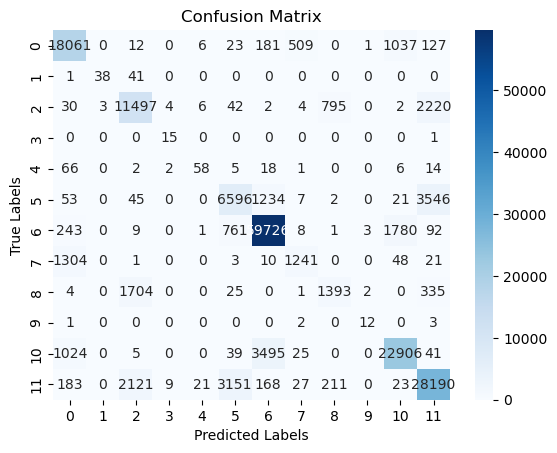

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()